# Analysis of U20 Thai data

## Quick summary

Thai is an isomorphic, harmonic language, with the following NP structure:

N Adj Num Dem

It is the mirror image of English.

Participants in this experiment were exposed to an English-like version of Thai where modifiers consistently preceded the noun they modified.

Note that Thai normally uses classifiers that were omitted in this experiment.  This makes it less ecological than the English equivalent experiment (Culbertson & Adger, 2014).

## Data checking and basic plotting

Load libraries and data in.

In [31]:
# allow inline plotting
%matplotlib inline

from matplotlib.pyplot import *

# dataframe package
import pandas as pd
# matplotlib wrapper for easier plotting
import seaborn as sns
# allow math functions
from numpy import * 

# %run clean-data.py # concatenates and cleans data into DataFrame called df
df = pd.read_csv('../data/U20Thai_TestData.csv')

Check that data were loaded correctly.

In [32]:
df.sample(5)

,ID,sex,condition,trials,phase,trial,type,correctChoice,choice1,choice2,...,mod,oldNoun,oldMod1,oldMod2,choiceType1,choiceType2,choiceType3,choiceType4,choice,binaryCorrect
2783,id_Wed Apr 19 2017 10:22:24 GMT+0700 (SE Asia ...,female,condition_AdjDem,testTrial32_outer_2_hat those_those hat_----_-...,test,testTrial32,outer,2,hat those,those hat,...,hat,True,True,NaN,NaN,NaN,NaN,NaN,2,1
1662,id_Mon Mar 20 2017 21:59:31 GMT+0700 (SE Asia ...,male,condition_AdjDem,testTrial31_inner-outer_2_pig furry these_thes...,test,testTrial31,inner-outer,2,pig furry these,these furry pig,...,pig,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
2686,id_Wed Apr 19 2017 10:16:22 GMT+0700 (SE Asia ...,female,condition_AdjDem,testTrial15_inner-outer_4_round these cherry_c...,test,testTrial15,inner-outer,4,round these cherry,cherry round these,...,cherry,True,False,True,Inner-Outer-N,N-Inner-Outer,N-Outer-Inner,Outer-Inner-N,4,1
1668,id_Mon Mar 20 2017 21:59:31 GMT+0700 (SE Asia ...,male,condition_AdjDem,testTrial37_inner_2_spatula purple_purple spat...,test,testTrial37,inner,2,spatula purple,purple spatula,...,spatula,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1
3430,id_Wed Apr 19 2017 13:14:00 GMT+0700 (SE Asia ...,male,condition_AdjNum,testTrial39_inner-outer_1_nine purple cow_cow ...,test,testTrial39,inner-outer,1,nine purple cow,cow purple nine,...,cow,True,True,False,Outer-Inner-N,N-Inner-Outer,N-Outer-Inner,Inner-Outer-N,1,1


Select data from the test phase only.

In [3]:
df = df[df.phase=='test']

Check how many participants we have in each condition:

In [4]:
df.groupby('condition').ID.nunique()

condition
condition_AdjDem    20
condition_AdjNum    21
condition_NumDem    16
Name: ID, dtype: int64

### Test trial accuracy (single modifier trials)

Check by-participant accuracy on single-modifier trials.  The critical column is `post` denoting whether or not (1 or 0) a response was postnominal.

In [33]:
singleMods = df[df.type.isin(['inner','outer'])].groupby(['ID', 'condition'], as_index=False).binaryCorrect.mean()

Plot histogram of single-modifier trial accuracy.

(0, 1)

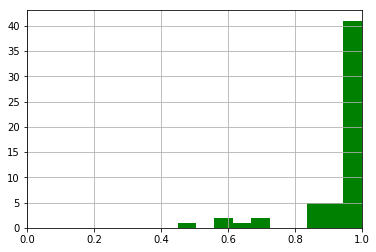

In [34]:
ax = df[df.type.isin(['inner','outer'])].groupby(['ID', 'condition']).binaryCorrect.mean().hist(color='green')
ax.set_xlim((0,1))

Participants are clearly responding correctly on single modifier trials, with only a couple of uncooperative people below the 0.85 threshold.  Their data are excluded.

In [35]:
badParticipants = singleMods[singleMods.binaryCorrect<0.85].ID.unique()
df = df[~df.ID.isin(badParticipants)]

### Participant N's

Now check N's again to see how many participants remain after exclusion.

In [36]:
df.groupby('condition').ID.nunique()

condition
condition_AdjDem    18
condition_AdjNum    18
condition_NumDem    15
Name: ID, dtype: int64

### Test trial accuracy (two-modifier trials)

Plot histogram of two-modifier trial accuracy for remaining participants.

(0, 1)

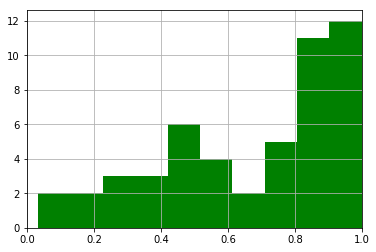

In [37]:
ax = df[df.type=='inner-outer'].groupby(['ID', 'condition']).binaryCorrect.mean().hist(color='green')
ax.set_xlim((0,1))

In [38]:
aggregators = {'binaryCorrect':mean}

gp = df[df.type=='inner-outer'].groupby(['ID', 'condition'], as_index=False).agg(aggregators)

order = ['condition_AdjDem', 'condition_NumDem', 'condition_AdjNum']

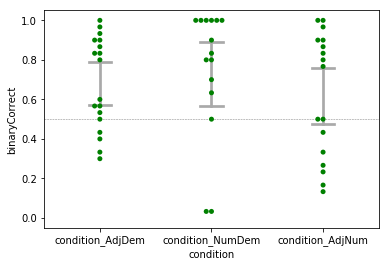

In [39]:
fig, ax = subplots()

sns.barplot(x='condition', y='binaryCorrect', data=gp, ax=ax, alpha=0, capsize=0.2, errcolor='darkgrey', order=order)
sns.swarmplot(x='condition', y='binaryCorrect', data=gp, ax=ax, color='green', order=order)

ax.set(ylim=(-0.05,1.05))
ax.plot(range(-1,4), [0.5]*5, color='grey', linestyle='--', linewidth=0.5)

### Checks

What are the participants below chance level doing?  Particularly in the AdjNum condition, where group performance is not different from chance (see stats below)...

What are they answering?  Are they selecting the incorrect prenominal order or are they not doing the task correctly?

In [40]:
def isIncorrectResponseTypePostnominal(i):
    row = df.loc[i]
    if row.binaryCorrect == 1:
        return 0
    
    response = row.choice
    responseType = row['choiceType'+str(response)]
    
    try:
        if responseType[-1] == 'N':
            return 0
        else:
            return 1
    except:
        return 0
    
df['responsePostnominal'] = df.index.map(lambda x: isIncorrectResponseTypePostnominal(x))

# print df.groupby('condition').responsePostnominal.count()

aggregators = {'responsePostnominal':mean}

gp = df[df.type=='inner-outer'].groupby(['ID', 'condition'], as_index=False).agg(aggregators)

It appears that very few responses overall are postnominal, so mostly, participants are on task.  Below is the proportion of incorrect (i.e., non [prenominal isomorphic]) responses that are actually postnominal (and thus, off-task).  Apparently participants who are giving non-isomorphic responses are still choosing the prenominal positioning.

condition
condition_AdjDem    0.129630
condition_AdjNum    0.066667
condition_NumDem    0.044444
Name: responsePostnominal, dtype: float64


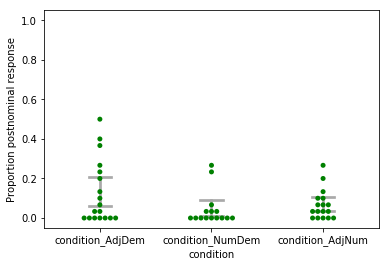

In [41]:
fig, ax = subplots()

sns.barplot(x='condition', y='responsePostnominal', data=gp, ax=ax, alpha=0, capsize=0.2, errcolor='darkgrey', order=order)
sns.swarmplot(x='condition', y='responsePostnominal', data=gp, ax=ax, color='green', order=order)

ax.set(ylim=(-0.05,1.05), ylabel='Proportion postnominal response')
# ax.plot(range(-1,4), [0.5]*5, color='grey', linestyle='--', linewidth=0.5)

print gp.groupby('condition').responsePostnominal.mean()

Of the low number of responses that are incorrect, most participants are choosing the non-isomorphic prenominal order.  While this goes against the universal, it at least means that they have understood that modifiers precede rather than follow the noun in the experiment (i.e., they are on-task).

## R modelling

Prepare to do R modelling.

In [42]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Load in data and create subsets on which each model will be run.

In [43]:
%%R
library('lme4')

d <- read.csv('../data/U20Thai_TestData.csv')
test <- subset(d, d$type=='inner-outer') # only select two modifier trials

testAdjDem <- subset(test, test$condition=="condition_AdjDem")
testAdjNum <- subset(test, test$condition=="condition_AdjNum")
testNumDem <- subset(test, test$condition=="condition_NumDem")

### Adj-Dem

Run models for the adj-dem condition, and test whether intercept is significantly different from chance level.

In [44]:
%%R

m1AdjDem <- glmer(binaryCorrect ~ 1 + (1|ID) + (1|mod), family=binomial, data=testAdjDem)
m0AdjDem <- glmer(binaryCorrect ~ 0 + (1|ID) + (1|mod), family=binomial, data=testAdjDem)

anova(m1AdjDem, m0AdjDem)

Data: testAdjDem
Models:
m0AdjDem: binaryCorrect ~ 0 + (1 | ID) + (1 | mod)
m1AdjDem: binaryCorrect ~ 1 + (1 | ID) + (1 | mod)
         Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)   
m0AdjDem  2 673.48 682.28 -334.74   669.48                            
m1AdjDem  3 668.06 681.25 -331.03   662.06 7.4271      1   0.006425 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


### Adj-Num

Run models for the adj-num condition, and test whether intercept is significantly different from chance level.

In [45]:
%%R

m1AdjNum <- glmer(binaryCorrect ~ 1 + (1|ID) + (1|mod), family=binomial, data=testAdjNum)
m0AdjNum <- glmer(binaryCorrect ~ 0 + (1|ID) + (1|mod), family=binomial, data=testAdjNum)

anova(m1AdjNum, m0AdjNum)

Data: testAdjNum
Models:
m0AdjNum: binaryCorrect ~ 0 + (1 | ID) + (1 | mod)
m1AdjNum: binaryCorrect ~ 1 + (1 | ID) + (1 | mod)
         Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)
m0AdjNum  2 598.27 607.06 -297.13   594.27                         
m1AdjNum  3 599.06 612.25 -296.53   593.06 1.2151      1     0.2703


### Num-Dem

Run models for the num-dem condition, and test whether intercept is significantly different from chance level.

In [46]:
%%R

m1NumDem <- glmer(binaryCorrect ~ 1 + (1|ID) + (1|mod), family=binomial, data=testNumDem)
m0NumDem <- glmer(binaryCorrect ~ 0 + (1|ID) + (1|mod), family=binomial, data=testNumDem)

anova(m1NumDem, m0NumDem)

Data: testNumDem
Models:
m0NumDem: binaryCorrect ~ 0 + (1 | ID) + (1 | mod)
m1NumDem: binaryCorrect ~ 1 + (1 | ID) + (1 | mod)
         Df    AIC    BIC  logLik deviance  Chisq Chi Df Pr(>Chisq)  
m0NumDem  2 347.92 356.27 -171.96   343.92                           
m1NumDem  3 343.89 356.41 -168.94   337.89 6.0372      1    0.01401 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Remarks

Something funny is going on in the AdjNum condition.  Participants seem less likely to choose the prenominal isomorphic order and are instead preferring the prenominal non-isomorphic order: Adj Num N.  This does not follow from Gump's original comments suggesting that poor performance might be to do with their choosing N Num Adj as the order.  They do not seem to be doing that.  Note the relatively low N though and how performance in the AdjNum condition is just barely at chance level.  Likely that in more controlled lab experiment with proper N, everything will be hunky dorey.